# Ejemplos DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## DBSCAN con dataset aleatorio (blobs)



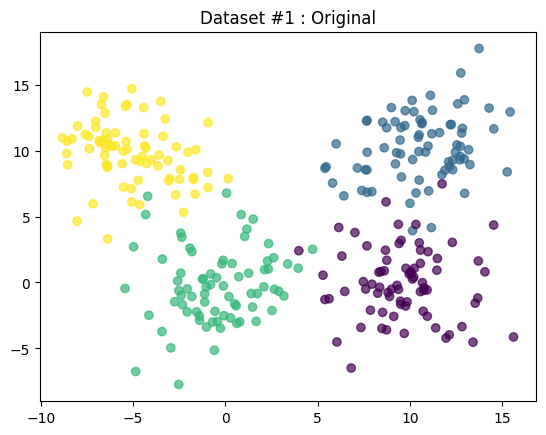

In [17]:
X1, label1 = make_blobs(n_samples=300,      # Genera 200 puntos en total
                        n_features=2,       # Cada punto tiene 2 coordenadas (x, y)
                        centers=[[10,0], [10,10], [0, 0], [-5, 10]],          # Queremos que los puntos se agrupen en 4 centros
                        cluster_std=2.5,      # Dispersión
                        random_state=45)    # Semilla para que el resultado sea siempre el mismo

plt.scatter(X1[:,0], X1[:,1], c=label1, alpha=0.7)
plt.title('Dataset #1 : Original') # Pone un título al gráfico.
plt.show()

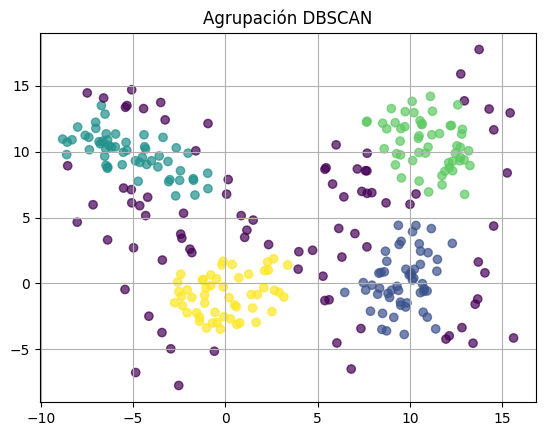

In [21]:
# Ejecutamos DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
# dbscan = DBSCAN(eps=1, min_samples=5) # eps -> radio, min_samples -> puntos mínimos
dbscan_labels = dbscan.fit_predict(X1) # Etiqueta 0 (morado en el plot) es el ruido

plt.scatter(X1[:,0], X1[:,1], c=dbscan_labels, alpha=0.7)
plt.title('Agrupación DBSCAN')
plt.grid(True)
plt.show()



## DBSCAN con dataset aleatorio (moons)






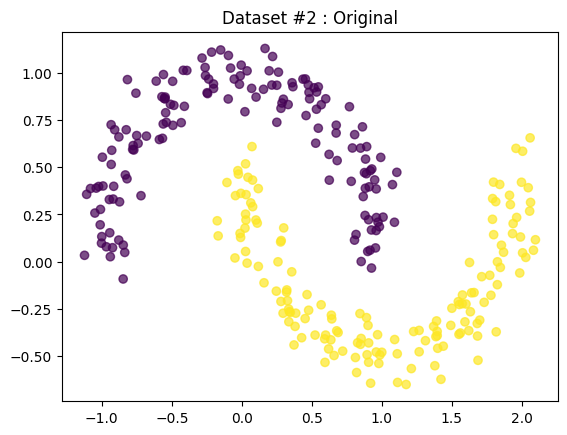

In [33]:
from sklearn.datasets import make_moons
X2,label2 = make_moons(n_samples=300, noise=0.1, random_state=123)
plt.scatter(X2[:,0], X2[:,1], c=label2, alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

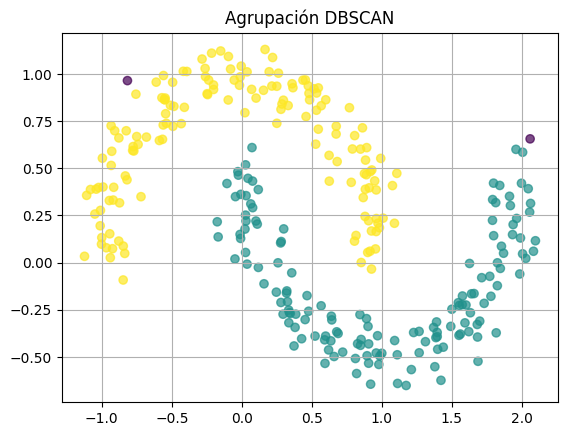

In [38]:
# dbscan2 = DBSCAN(eps=1.5, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
dbscan = DBSCAN(eps=0.2, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
dbscan_labels2 = dbscan.fit_predict(X2) # Etiqueta 0 (morado en el plot) es el ruido

plt.scatter(X2[:,0], X2[:,1], c=dbscan_labels2, alpha=0.7)
plt.title('Agrupación DBSCAN')
plt.grid(True)
plt.show()

## DBSCAN con dataset iris (flores)

Nos basamos en el ejemplo 2 a agrupación aglomerativa o el ejemplo 3 de Kmeans

Hay que pasarle el DBSCAN al dataset entero y mostrar la clasificación real vs clusters generados por el algoritmo. Ajustamos eps y min_samples
